In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## ONEMASS

shape of t_eval is (100,)
shape of sol.t is (100,)
shape of sol.y is (4, 100)


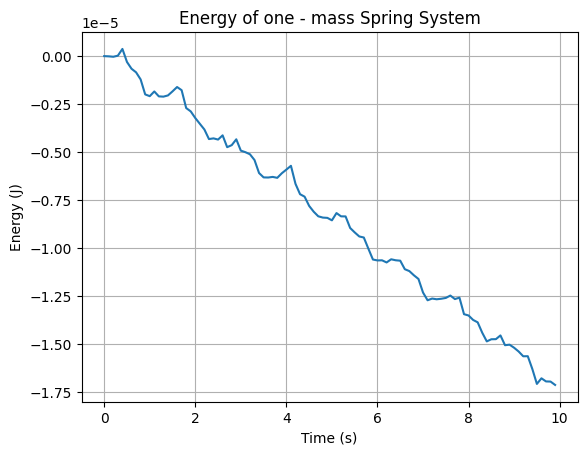

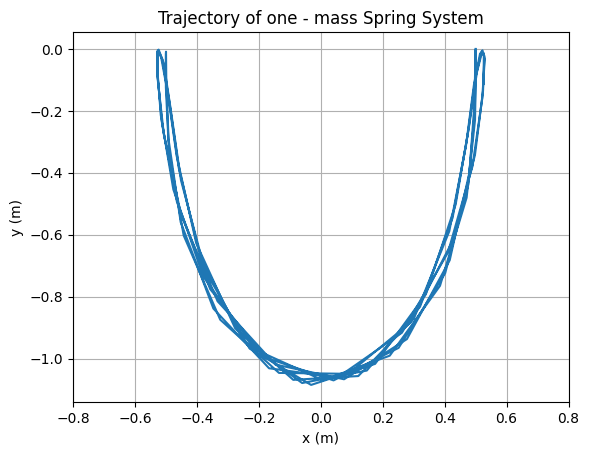

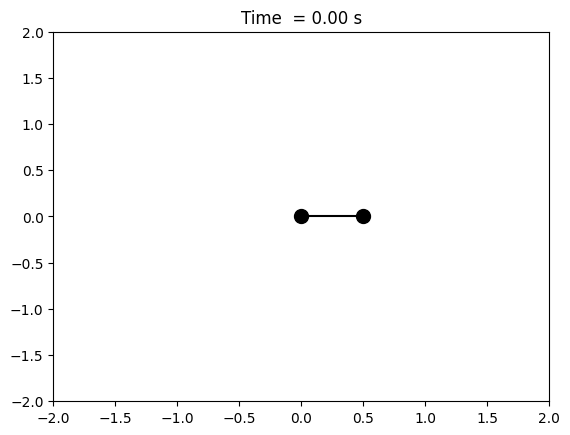

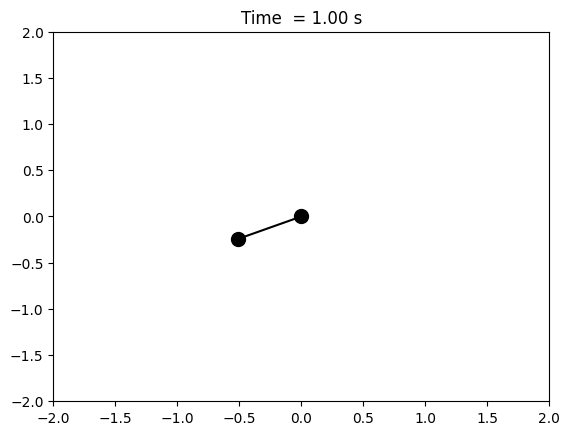

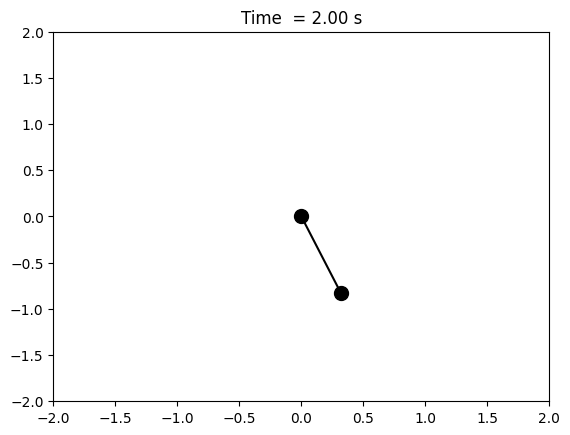

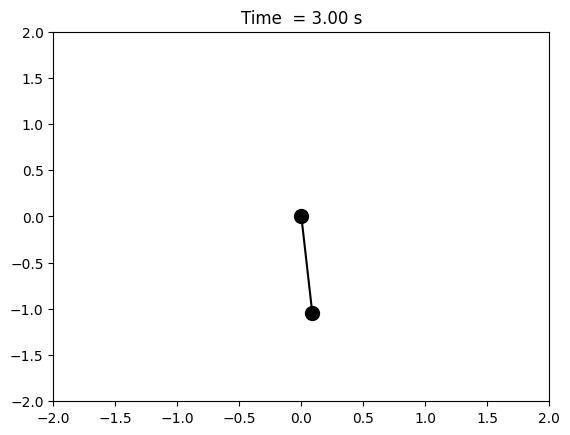

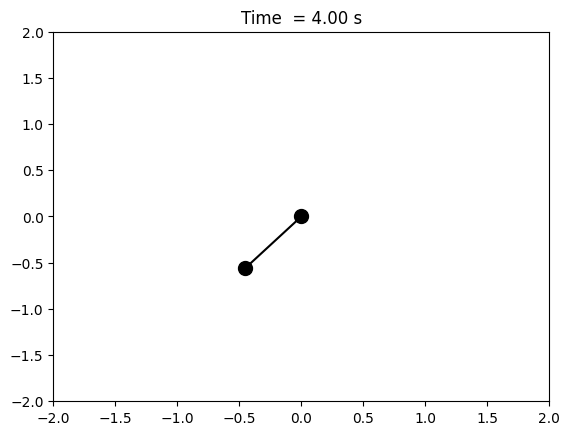

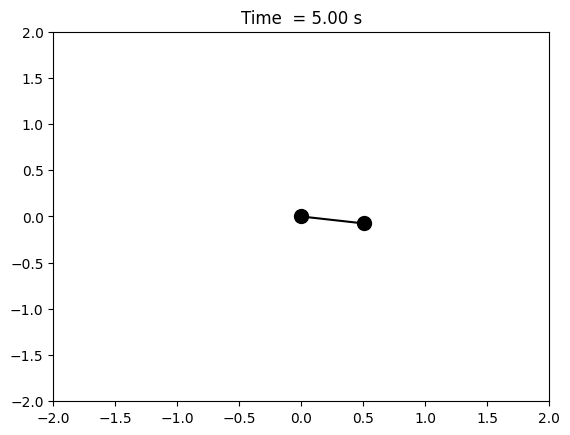

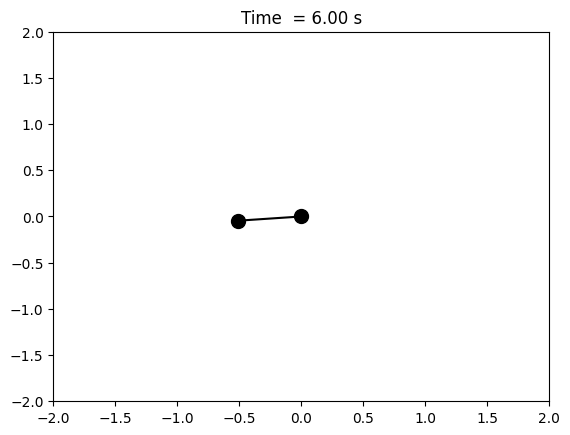

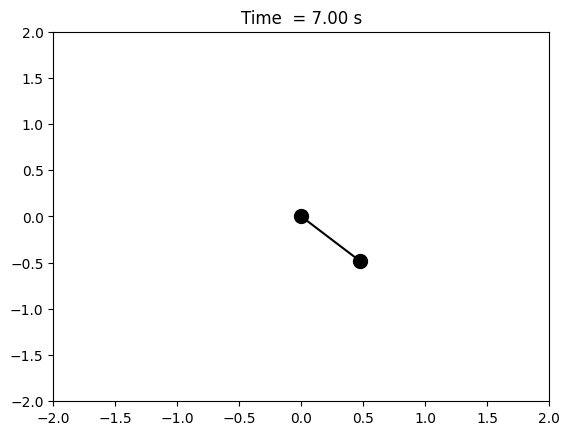

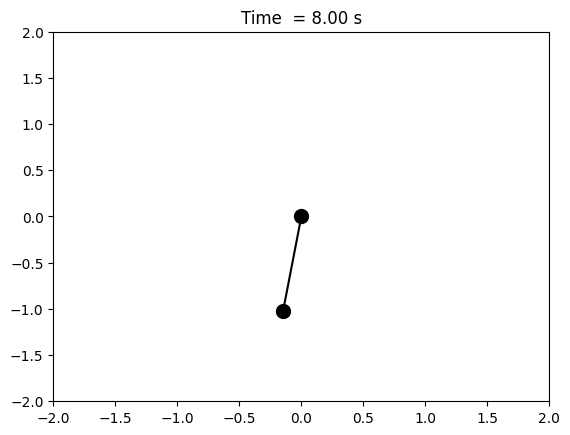

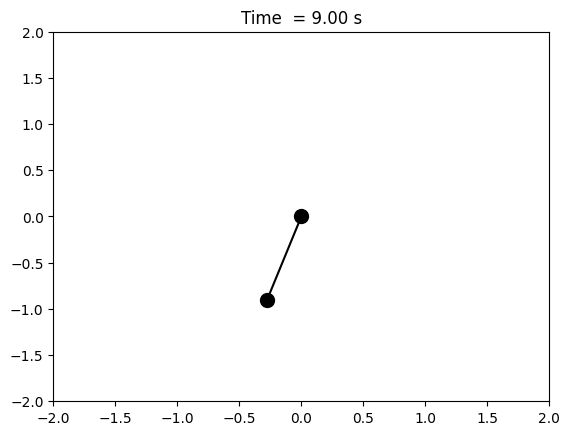

<Figure size 640x480 with 0 Axes>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m1 = 0.1       # mass (kg)
g = 10          # gravity (m/s^2)
k1 = 5          # spring constant (N/m)
c1 = 0          # damping coefficient
L1 = 0.5        # natural length (m)


def onemass(t,q):
    # q = [x1, y1 , x1dot , y1dot]
    x1, y1, x1dot, y1dot = q
    
    r1 = np.array([x1, y1])
    v1 = np.array([x1dot, y1dot])
    
    unit1 = r1 / np.linalg.norm(r1,2)
    
    Fs1 = -k1 * (np.linalg.norm(r1,2) - L1) * unit1
    Fc1 = -c1 * v1
    
    Fext1 = np.array([0, -m1 * g])
    
    F1 = Fs1 + Fc1 + Fext1
    M = np.diag([m1, m1])
    acc = np.linalg.inv(M) @ F1
    x1dotdot , y1dotdot = acc[0], acc[1]
    
    return [x1dot, y1dot, x1dotdot, y1dotdot]
         

#Simulation parameter
t_span = (0, 10)   # time span
t_eval = np.arange(t_span[0], t_span[1], 0.1)  # time evaluation points
q0 = [L1, 0.0, 0.0, 0.0]  # initial conditions: [x1, y1 , x1dot , y1dot]

sol = solve_ivp(onemass, t_span, q0, t_eval=t_eval, atol=1e-6, rtol=1e-6)
x1, y1, x1dot, y1dot = sol.y
t = sol.t

print(f"shape of t_eval is {t_eval.shape}")           #shape of t is (1000,)
print(f"shape of sol.t is {sol.t.shape}")   #shape of sol.t is (1000,)
print(f"shape of sol.y is {sol.y.shape}")   #shape of sol.y is (4, 1000)

deltax  = np.sqrt(x1**2 + y1**2) - L1
En = 0.5 * m1 * (x1dot**2 + y1dot**2) + m1 * g * y1 + 0.5 * k1 * deltax**2

plt.figure(1)
plt.plot(t,En)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of one - mass Spring System')
plt.grid()

plt.figure(2)
plt.plot(x1, y1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory of one - mass Spring System')
plt.axis('equal')
plt.grid()


plt.figure(3)
for k in range(0,len(t),10):
    plt.plot([0, x1[k]], [0, y1[k]], 'k-o', markersize=10)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.title(f"Time  = {t[k]:.2f} s")
    plt.pause(0.05)
    plt.clf()


## TWOMASS

sol.y shape is (8, 100)


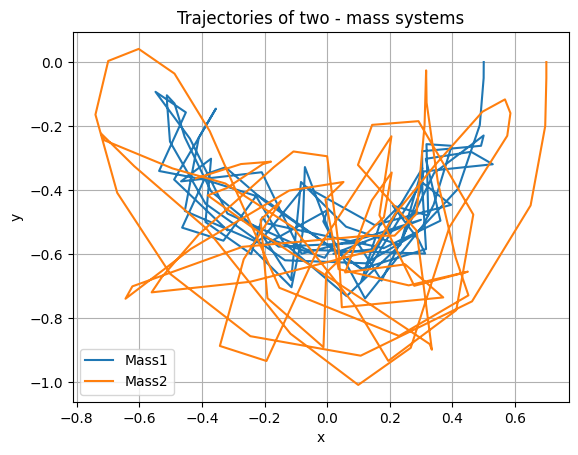

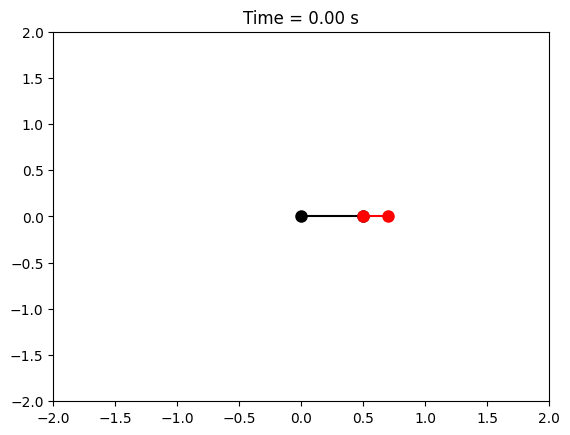

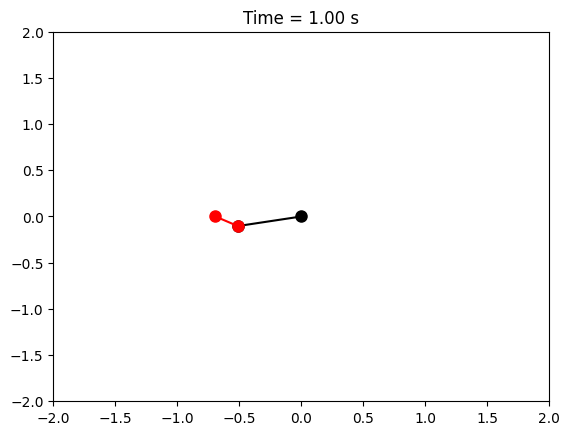

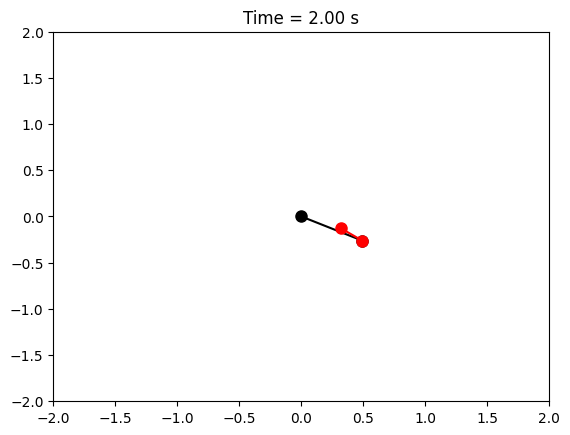

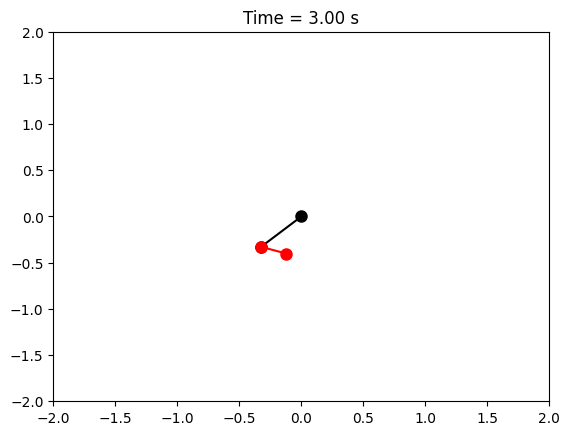

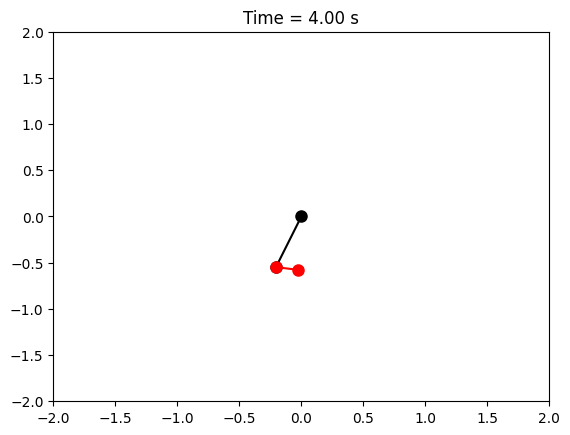

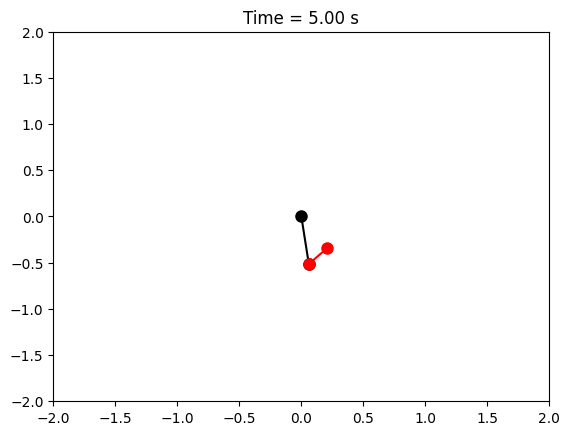

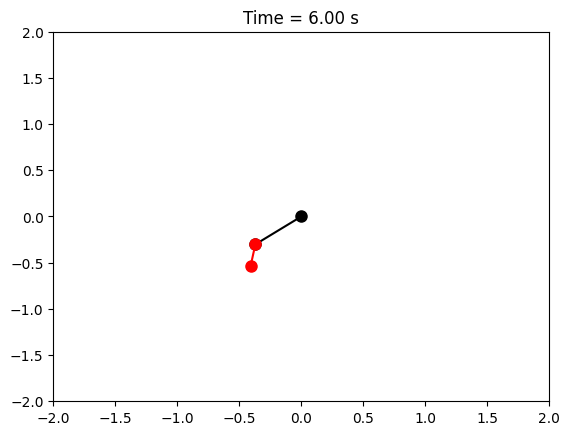

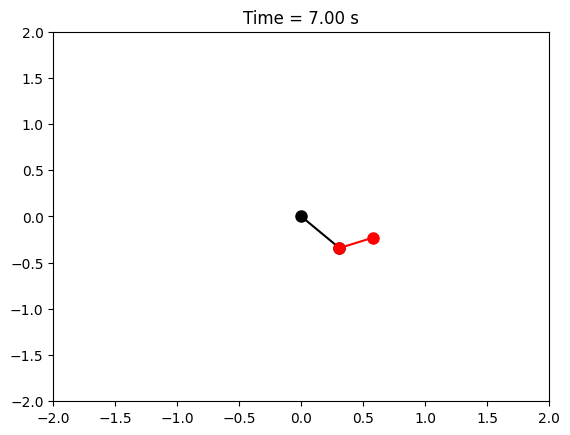

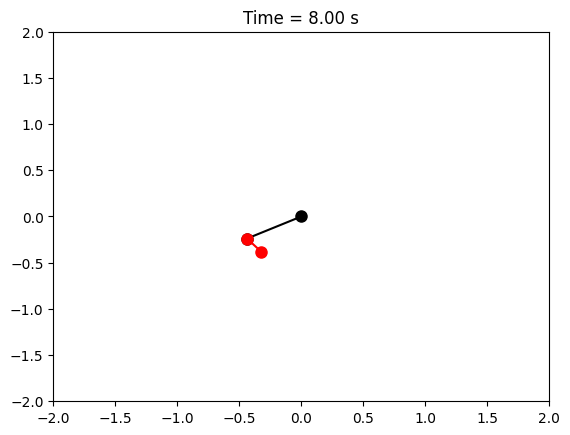

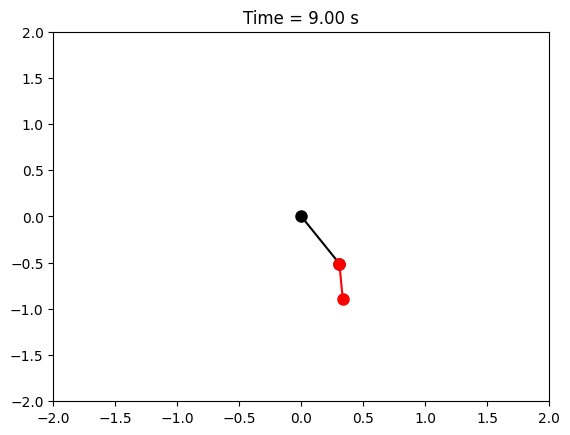

<Figure size 640x480 with 0 Axes>

In [52]:
def twomass(t,q):
    global M, m1, m2, k1, k2, c1, c2, L1, L2, g
    x1 , y1 , x2 , y2 , x1dot ,y1dot, x2dot , y2dot = q
    
    r1 = np.array([x1 , y1])
    r2 = np.array( [ x2, y2])
    v1 = np.array([x1dot , y1dot])
    v2 = np.array([x2dot , y2dot])
    
    u1 = r1 / np.linalg.norm(r1,2)
    u2 = (r2 - r1) / np.linalg.norm(r2-r1,2)
    
    Fs1 = -k1 * (np.linalg.norm(r1,2) - L1) * u1
    Fc1 = -c1 * v1
    Fs2 = -k2 * (np.linalg.norm(r2-r1,2) -L2) * u2
    Fc2 = -c2 * (v2 - v1)
    
    Fext = np.array([0, -m1 * g , 0, -m2 * g])
    
    F1 = Fs1 + Fc1  - Fs2  - Fc2
    F2 = Fs2 + Fc2
    
    M = np.diag([m1, m1, m2, m2])
    
    acc = np.linalg.inv(M) @ (np.concatenate((F1, F2)) + Fext)
    
    x1dotdot , y1dotdot , x2dotdot , y2dotdot = acc[0], acc[1], acc[2], acc[3]
    
    return [x1dot, y1dot, x2dot, y2dot, x1dotdot, y1dotdot, x2dotdot, y2dotdot]
    
    
# Define constants (global-like)
m1 = 1
m2 = 1
g = 10
k1 = 400
k2 = 400
c1 = 0
c2 = 0
L1 = 0.5
L2 = 0.2

#Simulation

t_span = (0,10)
t_eval = np.arange(t_span[0],t_span[1],0.1)
q0 = [ L1 , 0 , L1+L2 , 0 , 0, 0, 0 ,0]

sol = solve_ivp(twomass,t_span,q0,t_eval = t_eval)

print(f"sol.y shape is {sol.y.shape}")

t = sol.t
x1 , y1 , x2 , y2 , x1dot ,y1dot, x2dot , y2dot = sol.y


plt.figure(1)
plt.plot(x1 , y1 , label = "Mass1")
plt.plot(x2 , y2 , label = "Mass2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Trajectories of two - mass systems')
plt.grid()
plt.show(block = False)



# Animation
# ---------------------------------
plt.figure(2)
for k in range(0, len(t), 10):
    plt.plot([0, x1[k]], [0, y1[k]], 'ko-', markersize=8)
    plt.plot([x1[k], x2[k]], [y1[k], y2[k]], 'ro-', markersize=8)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.title(f"Time = {t[k]:.2f} s")
    plt.pause(0.05)
    plt.clf()



## Double Pendulum

In [54]:
# m1 = 1.0
# m2 = 1.0
# L1 = 1.0
# L2 = 1.0
# g = 1.0
# alpha = 10.0
# beta = 100.0


# def DoublePendulum(t,q):
#     x1 ,y1 , x2 , y2, x1dot , y1dot , x2dot , y2dot = q
    
#     e1 = x1**2 + y1**2 - L1**2
#     e2 = (x2-x1)**2 + (y2-y1)**2 - L2**2
    
#     J = np.array([
#         [2*x1 , 2*y1 , 0 , 0],
#         [-2*(x2-x1) , -2*(y2-y1) , 2*(x2-x1) , 2*(y2-y1)]
#     ])
    
#     Jdot = np.array([
#         [2*x1dot , 2*y1dot , 0 , 0],
#         [-2*(x2dot-x1dot) , -2*(y2dot-y1dot) , 2*(x2dot-x1dot) , 2*(y2dot-y1dot)]
#     ])
    
#     edot = J @ np.array([x1dot , y1dot , x2dot , y2dot]).reshape(-1,1) 
    
#     # print(f"shape of J is {J.shape} , edot is {edot.shape}")
#     M = np.diag([m1, m1, m2, m2])
#     Fext = np.array([0, -m1*g , 0, -m2*g]).reshape(-1,1)
    
#     Minv = np.linalg.inv(M)
    
#     Lambda = - np.linalg.inv(J@Minv@J.T) @ ( J@Minv@Fext + Jdot @ np.array([x1dot , y1dot , x2dot , y2dot]).reshape(-1,1) + alpha * edot + beta * np.array([e1 , e2]).reshape(-1,1))
    
#     accel = Minv @ ( Fext+ J.T @ Lambda )
    
#     # print(f"M shape is {M.shape}  , Lambda shape is {Lambda.shape} , accel shape is {accel.shape}")
#     # M shape is (4, 4)  , Lambda shape is (2, 1) , accel shape is (4, 1)
#     accel = accel.flatten()

#     return [x1dot, y1dot, x2dot, y2dot, accel[0], accel[1], accel[2], accel[3]]
    

# t_span = (0,10)
# t_eval = np.arange(t_span[0],t_span[1],0.5)
# print(f"t_eval is {t_eval.shape}")
# q0 = [ L1 , 0 , L1+L2 , 0 , 0, 0, 0 ,0]

# sol = solve_ivp(DoublePendulum, t_span, q0, t_eval=t_eval, method='Radau')

# print(f"sol.y shape is {sol.y.shape}")

# t = sol.t
# x1 , y1 , x2 , y2 , x1dot ,y1dot, x2dot , y2dot = sol.y
# print(f"x1 shape is {x1.shape} , y1 shape is {y1.shape} , x2 shape is {x2.shape} , y2 shape is {y2.shape}")


# e1 = x1**2 + y1**2 - L1**2
# e2 = (x2-x1)**2 + (y2-y1)**2 -L2**2


# plt.figure(1)
# plt.plot(t,e1,label = "Constraint 1 error")
# plt.plot(t, e2, label='Constraint 2')
# plt.xlabel('Time (s)')
# plt.ylabel('Constraint Error')
# plt.title('Constraint Errors vs Time')
# plt.legend()
# plt.grid()

# plt.figure(2)
# for k in range(0, len(t), 5):
#     plt.plot([0, x1[k]], [0, y1[k]], 'ko-', markersize=10)
#     plt.plot([x1[k], x2[k]], [y1[k], y2[k]], 'ro-', markersize=10)
#     plt.xlim([-3, 3])
#     plt.ylim([-3, 3])
#     plt.title(f"Time = {t[k]:.2f} s")
#     plt.pause(0.05)
#     plt.clf()

# plt.show()

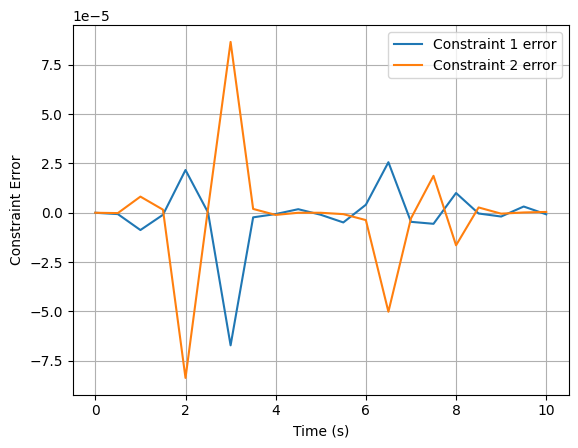

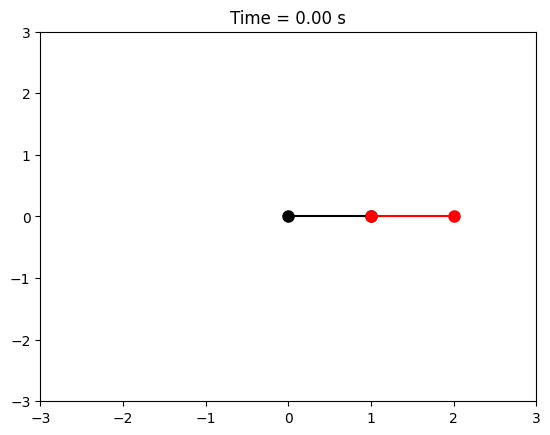

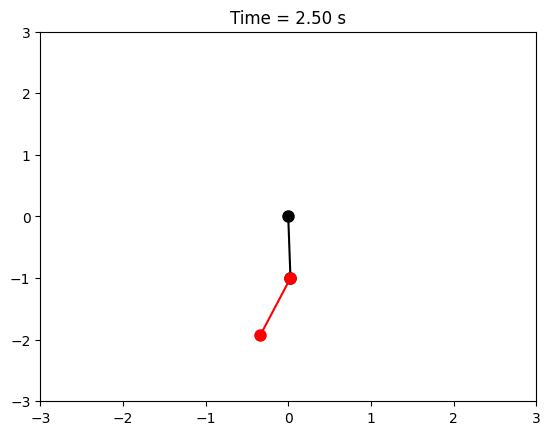

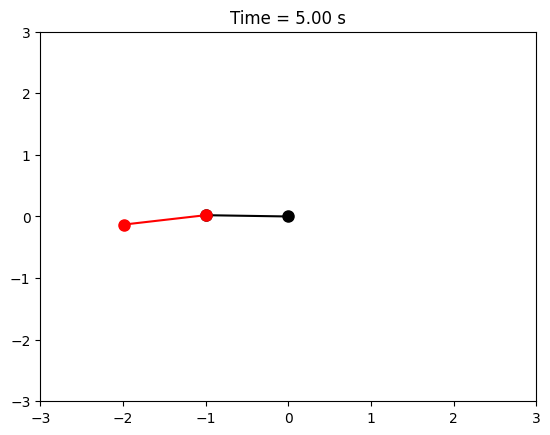

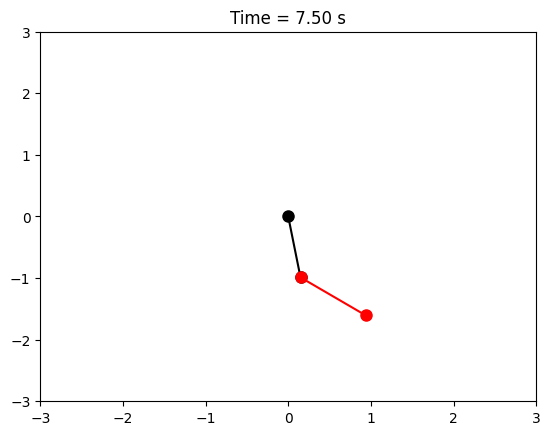

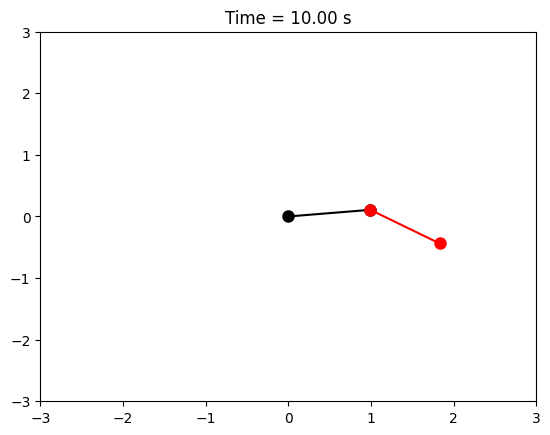

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m1 = 1.0
m2 = 1.0
L1 = 1.0
L2 = 1.0
g = 1.0
alpha = 10.0
beta = 100.0

def DoublePendulum(t, q):
    x1, y1, x2, y2, x1dot, y1dot, x2dot, y2dot = q

    e1 = x1**2 + y1**2 - L1**2
    e2 = (x2 - x1)**2 + (y2 - y1)**2 - L2**2

    J = np.array([
        [2*x1, 2*y1, 0, 0],
        [-2*(x2-x1), -2*(y2-y1), 2*(x2-x1), 2*(y2-y1)]
    ])

    Jdot = np.array([
        [2*x1dot, 2*y1dot, 0, 0],
        [-2*(x2dot-x1dot), -2*(y2dot-y1dot), 2*(x2dot-x1dot), 2*(y2dot-y1dot)]
    ])

    v = np.array([x1dot, y1dot, x2dot, y2dot]).reshape(-1,1)
    edot = J @ v

    M = np.diag([m1, m1, m2, m2])
    Fext = np.array([0, -m1*g, 0, -m2*g]).reshape(-1,1)
    Minv = np.linalg.inv(M)

    e = np.array([e1, e2]).reshape(-1,1)

    Lambda = - np.linalg.inv(J @ Minv @ J.T) @ (J @ Minv @ Fext + Jdot @ v + alpha * edot + beta * e)
    accel = (Minv @ (Fext + J.T @ Lambda)).flatten()

    return [x1dot, y1dot, x2dot, y2dot, accel[0], accel[1], accel[2], accel[3]]

# Initial conditions
t_span = (0, 10)
t_eval = np.arange(t_span[0], t_span[1]+0.5 , 0.5)
q0 = [L1, 0, L1 + L2, 0, 0, 0, 0, 0]

# Solve ODE
sol = solve_ivp(DoublePendulum, t_span, q0, t_eval=t_eval, method='Radau')


t = sol.t
x1, y1, x2, y2, *_ = sol.y

e1 = x1**2 + y1**2 - L1**2
e2 = (x2 - x1)**2 + (y2 - y1)**2 - L2**2

plt.figure(1)
plt.plot(t, e1, label="Constraint 1 error")
plt.plot(t, e2, label="Constraint 2 error")
plt.xlabel("Time (s)")
plt.ylabel("Constraint Error")
plt.legend()
plt.grid()

plt.figure(2)
for k in range(0, len(t), 5):
    plt.plot([0, x1[k]], [0, y1[k]], 'ko-', markersize=8)
    plt.plot([x1[k], x2[k]], [y1[k], y2[k]], 'ro-', markersize=8)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.title(f"Time = {t[k]:.2f} s")
    plt.pause(0.05)
    # plt.clf()

plt.show()


## KAPITZA

t_eval shape: (101,), sol.t shape: (101,), sol.y shape: (4, 101)


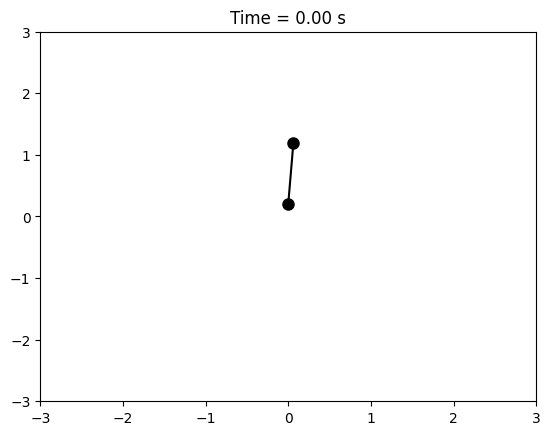

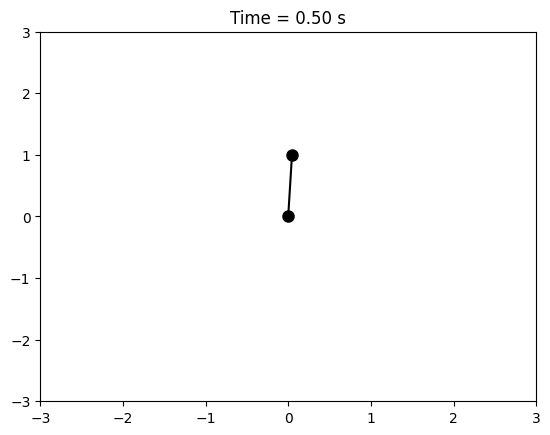

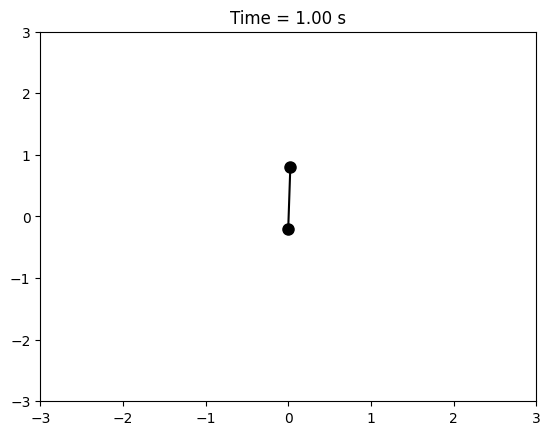

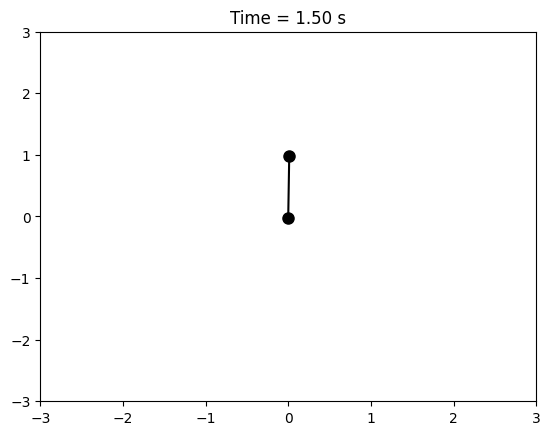

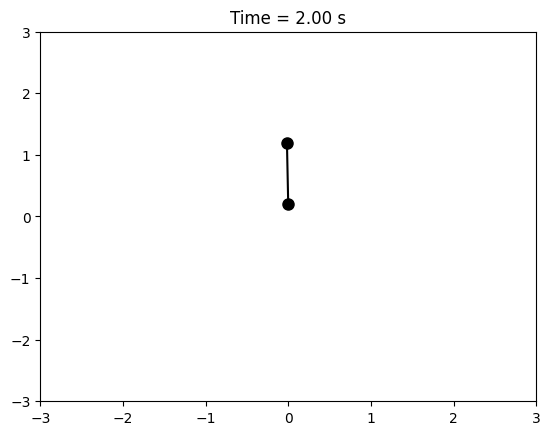

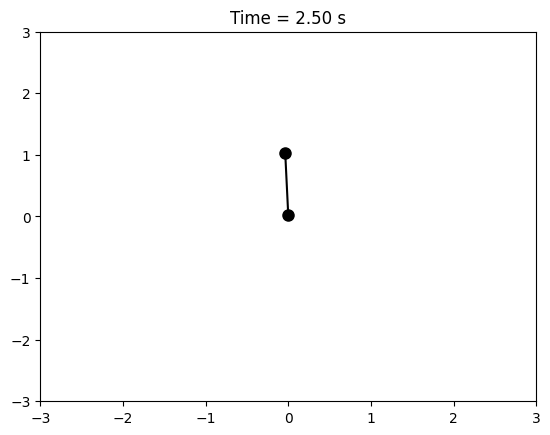

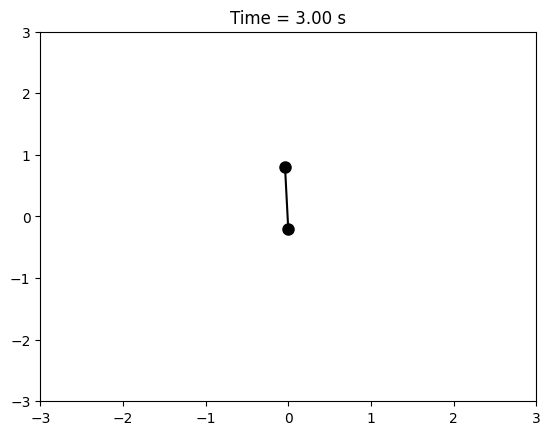

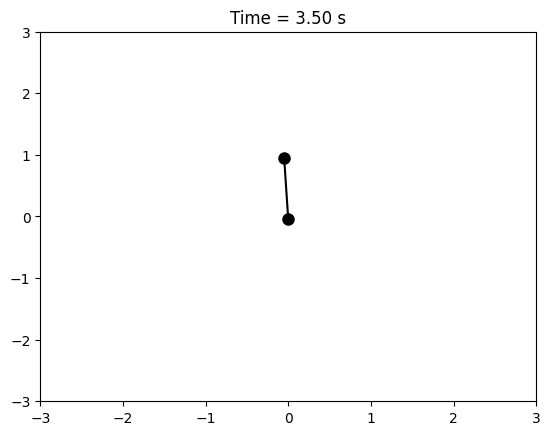

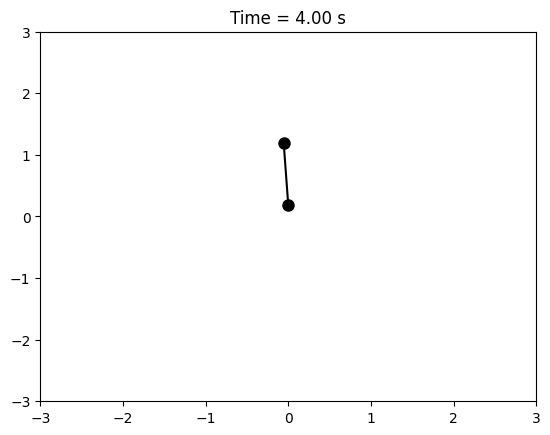

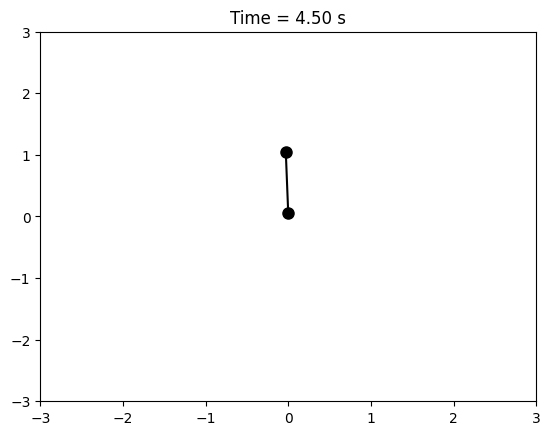

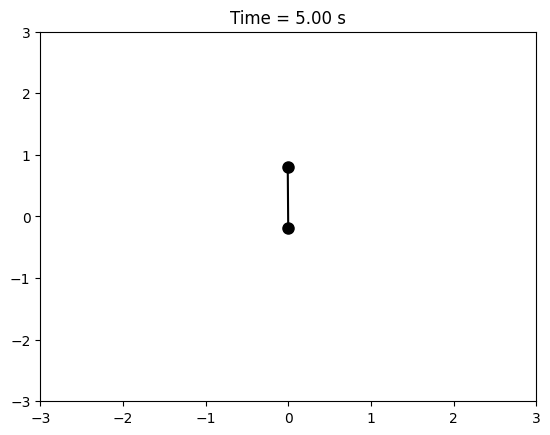

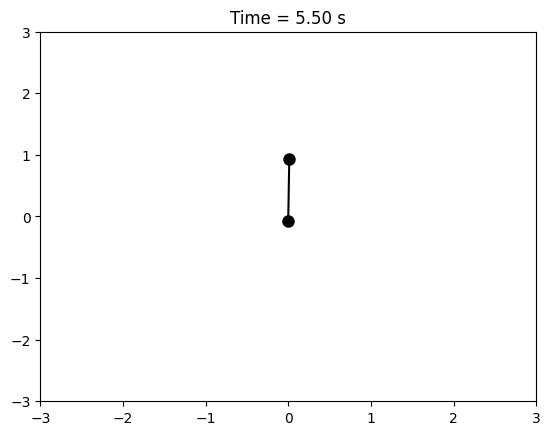

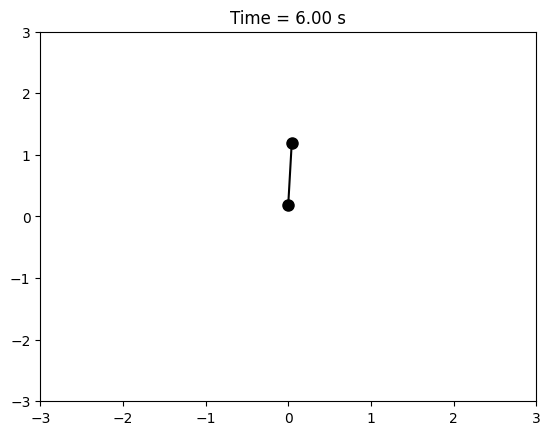

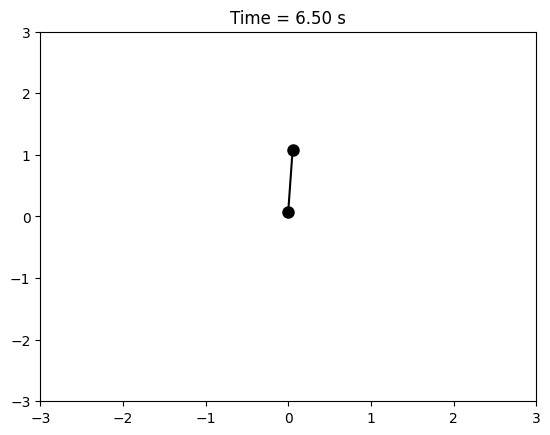

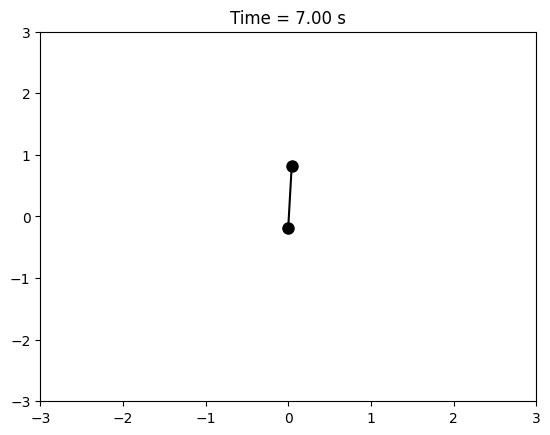

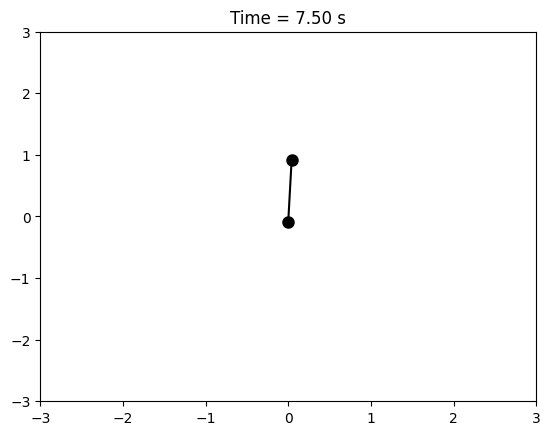

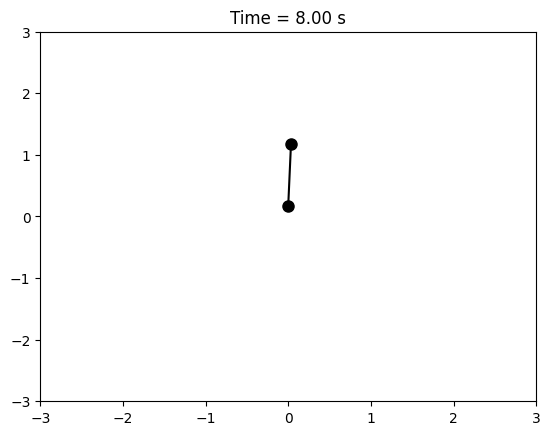

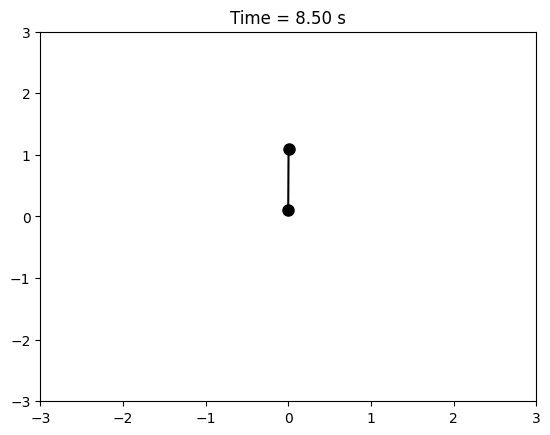

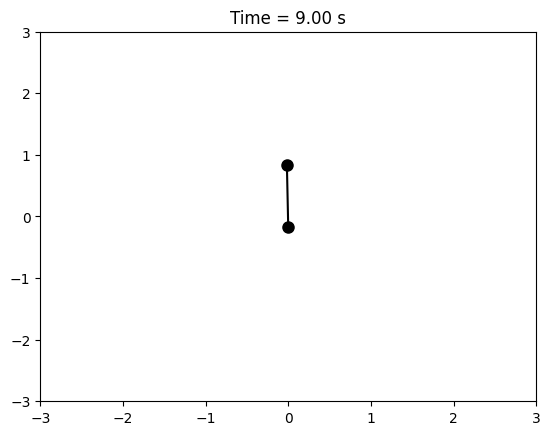

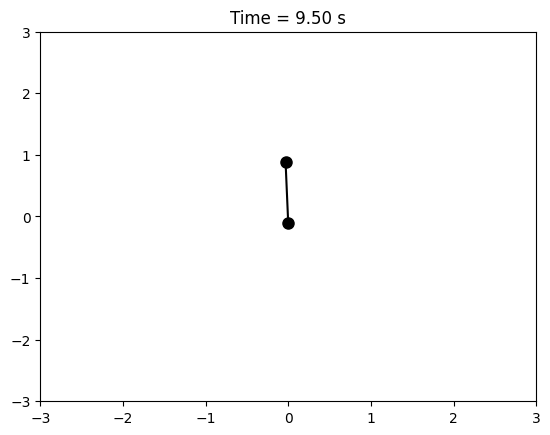

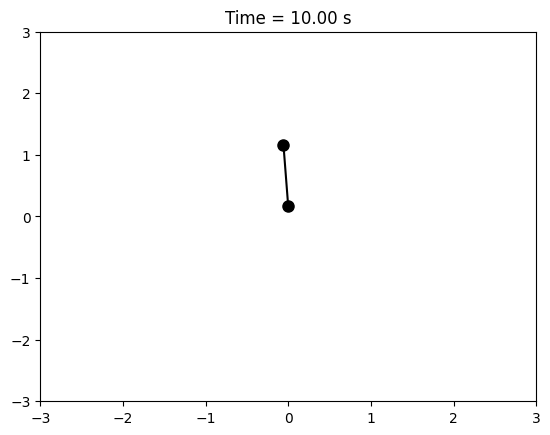

<Figure size 640x480 with 0 Axes>

In [59]:

m = 1.0
L = 1.0
g = 1.0
a = 10.0
b = 100.0
Ax = 0
Ay = 0.2
w = 3 * np.sqrt(2*g*L/Ay)


def Kapitza(t, p):
    x1, y1, x1dot, y1dot = p

    beta = Ax * np.sin(w * t)
    betadot = Ax * w * np.cos(w * t)
    betadotdot = -Ax * w**2 * np.sin(w * t)
    mu = Ay * np.cos(w * t)
    mudot = -Ay * w * np.sin(w * t)
    mudotdot = -Ay * w**2 * np.cos(w * t)

    # Define constraint
    e = (x1 - beta)**2 + (y1 - mu)**2 - L**2

    # Jacobian and its derivative
    J = np.array([[2*(x1 - beta), 2*(y1 - mu)]])
    Jdot = np.array([[2*(x1dot - betadot), 2*(y1dot - mudot)]])

    qdot = np.array([x1dot - betadot, y1dot - mudot]).reshape(-1, 1)
    edot = J @ qdot
    X0dotdot = np.array([betadotdot, mudotdot]).reshape(-1, 1)

    Fext = np.array([0, -m*g]).reshape(-1, 1)

    value = J @ X0dotdot - ((1/m) * (J @ Fext) + Jdot @ qdot + a * edot + b * e)
    Lambda = np.linalg.inv((1/m) * (J @ J.T)) @ value

    accel = (1/m) * (Fext + J.T @ Lambda)
    accel = accel.flatten()
    
    # print(f"J shape: {J.shape}, Jdot shape: {Jdot.shape}, Lambda shape: {Lambda.shape}")
    # print(f"qdot shape: {qdot.shape}, edot shape: {edot.shape}, value shape: {value.shape}")
    
    return [x1dot, y1dot, accel[0], accel[1]]


t_span = (0,10)
t_eval = np.arange(t_span[0] , t_span[1]+0.1 , 0.1)
p0 = [ L * np.sin(np.pi / 50),Ay + L * np.cos(np.pi / 50),Ax * w,0.0]  

sol = solve_ivp(Kapitza , t_span , p0 , t_eval = t_eval , method = 'Radau')

t = sol.t
x1 , y1 , x1dot , y1dot = sol.y

beta = Ax * np.sin(w * t)
mu = Ay * np.cos(w * t)

e = (x1 - beta)**2 + (y1 - mu)**2 - L**2

print(f"t_eval shape: {t_eval.shape}, sol.t shape: {sol.t.shape}, sol.y shape: {sol.y.shape}")

plt.figure(1)
for k in range(0,len(t),5):
    plt.plot([beta[k], x1[k]], [mu[k], y1[k]], 'ko-', markersize=8)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.title(f"Time = {t[k]:.2f} s")
    plt.pause(0.05)
    plt.clf()

## DOUBLE PENDULUM RIGID BODY

In [4]:
# import numpy as np
# x= np.dot([1,2], [3,4])
# y = np.array([1,2]) @ np.array([3,4])
# z = np.array([1,2]).dot( np.array([3,4]) )
# print(f"x = {x}, y = {y}, z = {z}")


x = 11, y = 11, z = 11


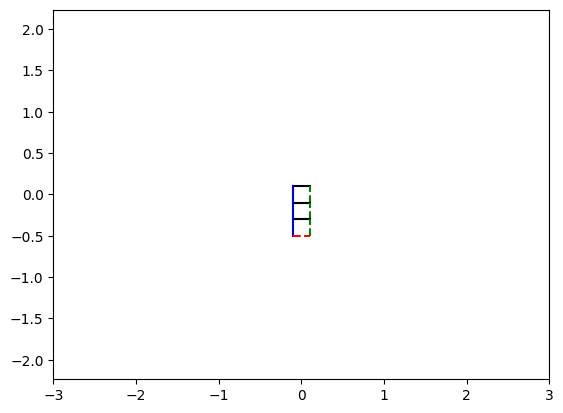

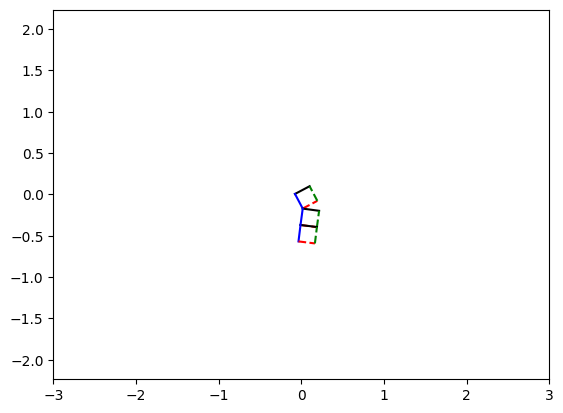

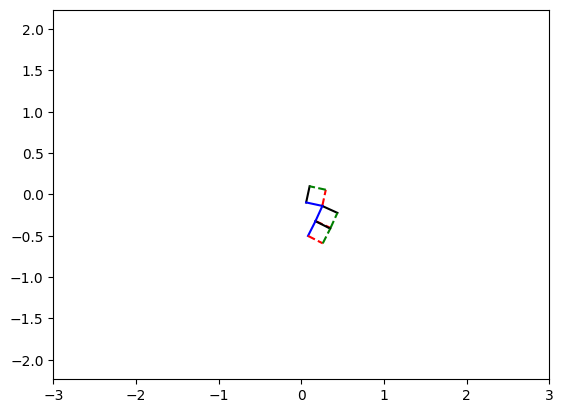

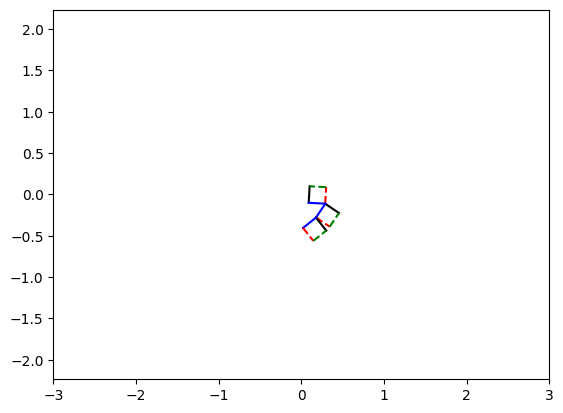

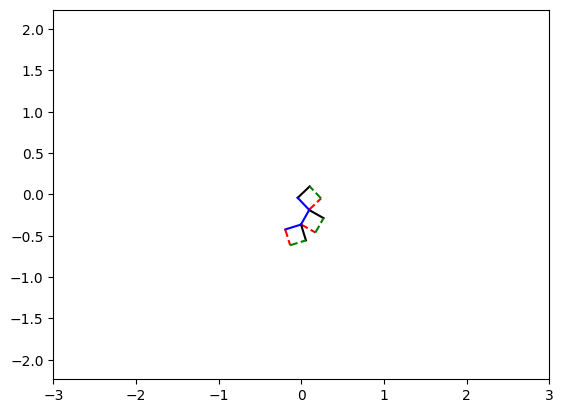

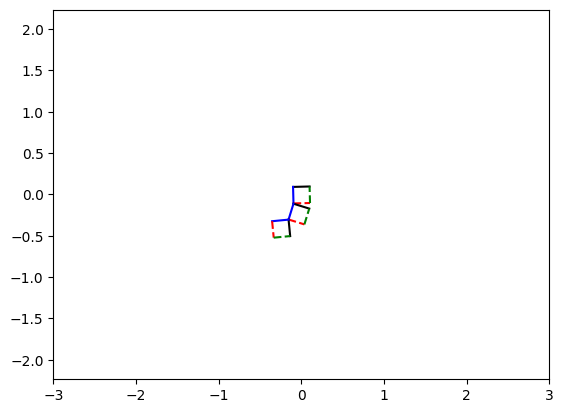

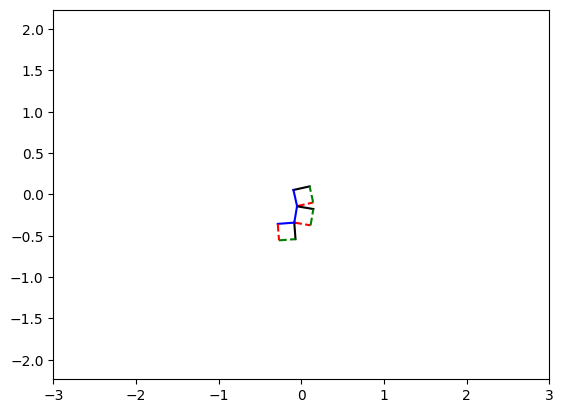

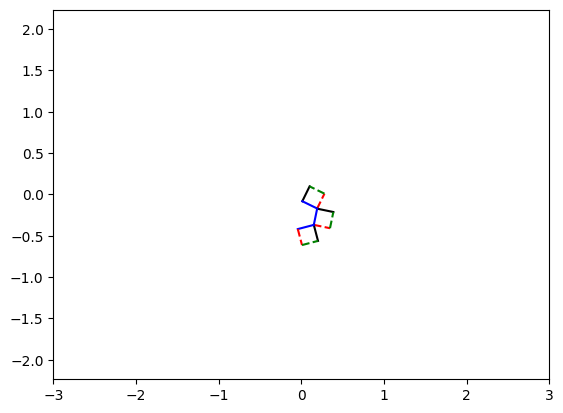

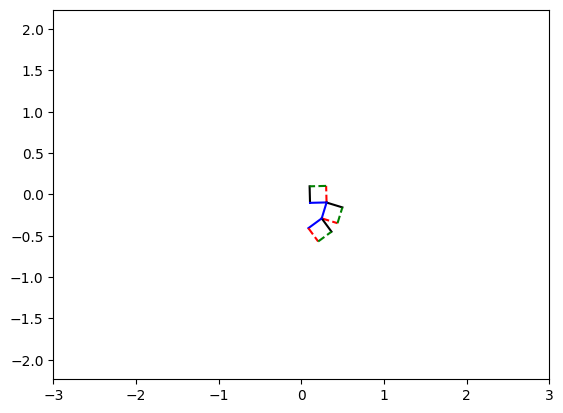

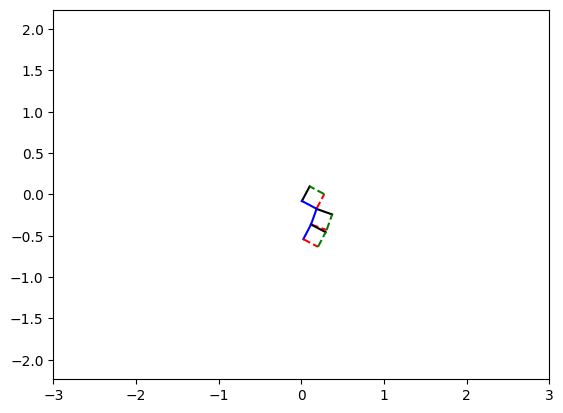

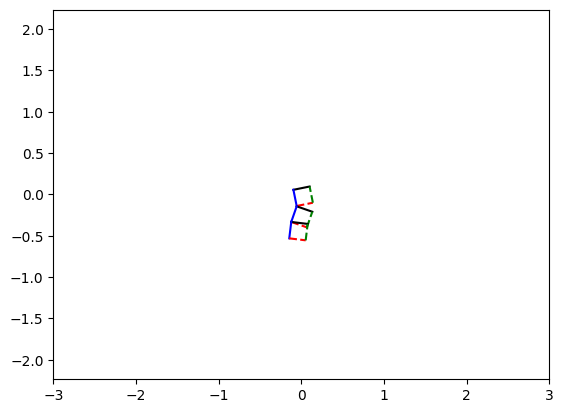

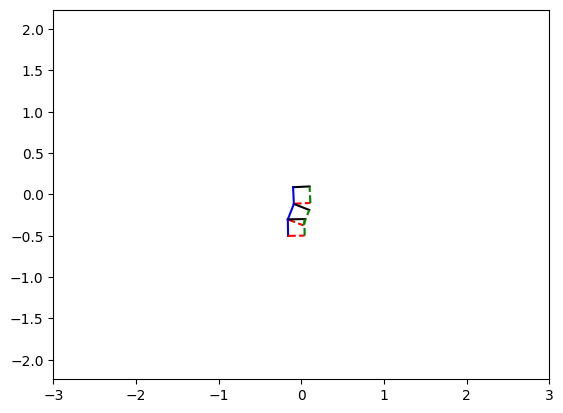

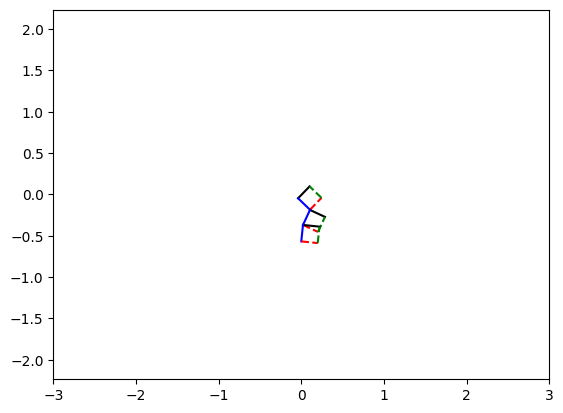

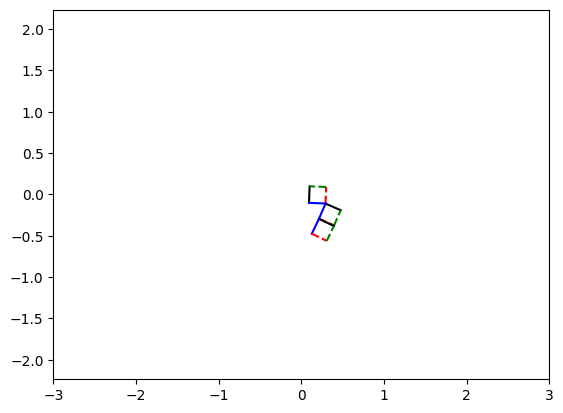

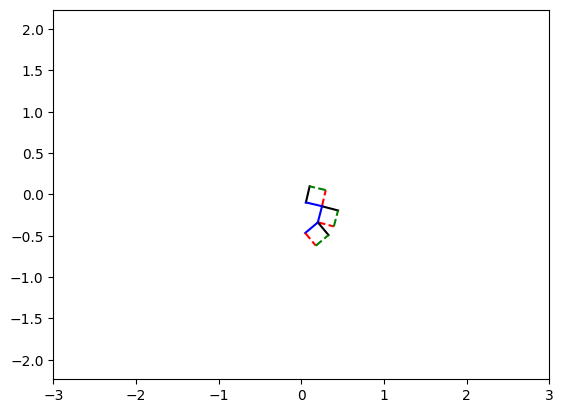

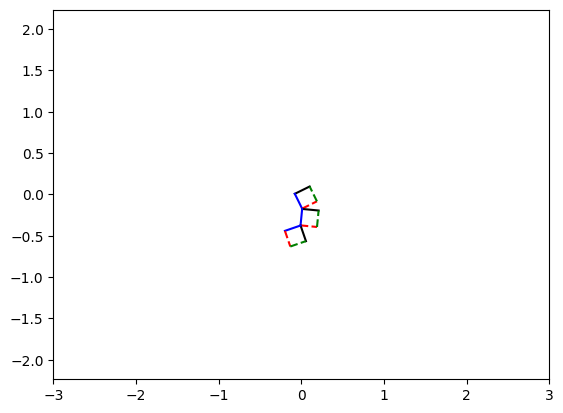

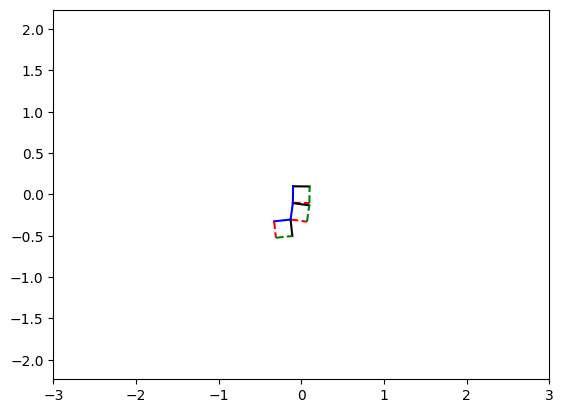

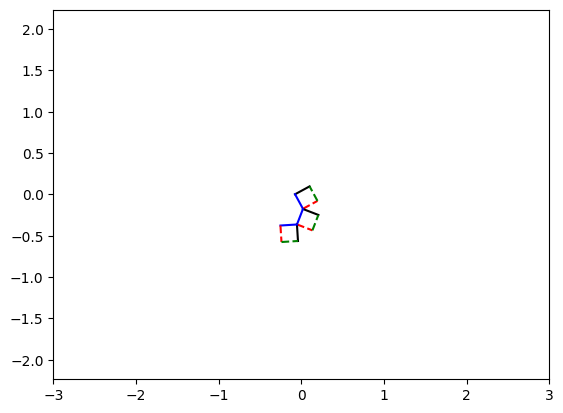

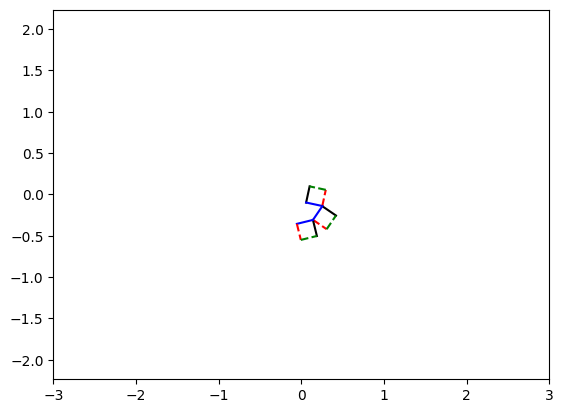

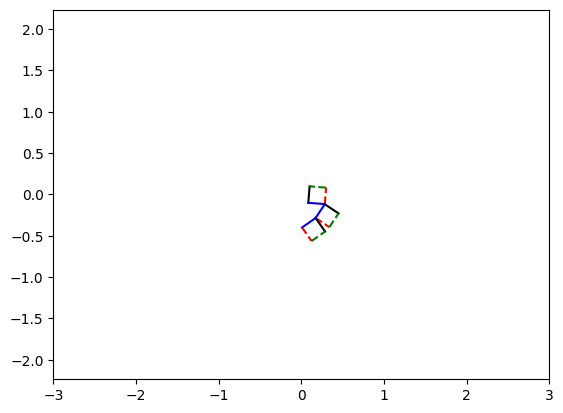

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m1 = 1.0
m2 = 1.0
m3 = 1.0
Jm1 = 1.0
Jm2 = 1.0
Jm3 = 1.0
g = 10.0
alpha = 100.0
beta = 100.0


p1 = np.array([0.1,0.1])
p2 = np.array([-0.1,0.1])
p3 = np.array([-0.1,-0.1])
p4 = np.array([0.1,-0.1])

u1 = np.array([0.1,0.1])
u2 = np.array([-0.1,0.1])
u3 = np.array([-0.1,-0.1])
u4 = np.array([0.1,-0.1])

w1 = np.array([0.1,0.1])
w2 = np.array([-0.1,0.1])
w3 = np.array([-0.1,-0.1])
w4 = np.array([0.1,-0.1])

def R(theta):
    D = np.array([
        [np.cos(theta) , -np.sin(theta)],
        [np.sin(theta) , np.cos(theta)]
    ])
    return D

def Rdot(theta):
    D = np.array([
        [-np.sin(theta) , -np.cos(theta)],
        [np.cos(theta) , -np.sin(theta)]
    ])
    return D

def Rdotdot(theta):
    D = np.array([
        [-np.cos(theta) , np.sin(theta)],
        [-np.sin(theta) , -np.cos(theta)]
    ])
    return D


def DPRB(t,p):
    xp , yp , thetap , xu ,yu , thetau , xw , yw , thetaw , xpdot, ypdot , thetapdot, xudot, yudot, thetaudot, xwdot, ywdot , thetawdot = p
    rcp = np.array([xp,yp])
    rcu = np.array([xu,yu])
    rcw = np.array([xw,yw])
    
    r = np.array([xp , yp , thetap , xu , yu , thetau , xw , yw , thetaw])
    rdot = np.array([xpdot , ypdot , thetapdot , xudot , yudot , thetaudot , xwdot , ywdot , thetawdot])
    
    phi1 = rcp + R(thetap).dot(p1) - p1
    phi2 = rcp + R(thetap).dot(p3) - rcu - R(thetau).dot(u2)
    phi3 = rcu + R(thetau).dot(u3) - rcw - R(thetaw).dot(w2)

    phi = np.hstack((phi1,phi2,phi3))
    
    J = np.array([
        [1,0,float(Rdot(thetap).dot(p1)[0]) , 0,0,0 ,0,0,0],
        [0,1,float(Rdot(thetap).dot(p1)[1]) , 0,0,0, 0,0,0],
        [1,0,float(Rdot(thetap).dot(p3)[0]) , -1,0,-float(Rdot(thetau).dot(u2)[0]) , 0,0,0],
        [0,1,float(Rdot(thetap).dot(p3)[1]) , 0,-1,-float(Rdot(thetau).dot(u2)[1]) , 0,0,0],
        [0,0,0,1,0,float(Rdot(thetau).dot(u3)[0]) , -1,0,-float(Rdot(thetaw).dot(w2)[0])],
        [0,0,0,0,1,float(Rdot(thetau).dot(u3)[1]) , 0,-1,-float(Rdot(thetaw).dot(w2)[1])]
    ])
    
    Jdot = np.array([
        [0,0,float(Rdotdot(thetap).dot(p1)[0]) , 0,0,0 ,0,0,0],
        [0,0,float(Rdotdot(thetap).dot(p1)[1]) , 0,0,0, 0,0,0],
        [0,0,float(Rdotdot(thetap).dot(p3)[0]) , 0,0,-float(Rdotdot(thetau).dot(u2)[0]) , 0,0,0],
        [0,0,float(Rdotdot(thetap).dot(p3)[1]) , 0,0,-float(Rdotdot(thetau).dot(u2)[1]) , 0,0,0],
        [0,0,0,0,0,float(Rdotdot(thetau).dot(u3)[0]) , 0,0,-float(Rdotdot(thetaw).dot(w2)[0])],
        [0,0,0,0,0,float(Rdotdot(thetau).dot(u3)[1]) , 0,0,-float(Rdotdot(thetaw).dot(w2)[1])]
    ])
    
    M  = np.diag([m1 , m1 , Jm1 , m2 , m2 , Jm2 , m3 , m3 , Jm3])
    Minv = np.linalg.inv(M)
    
    Fext = np.array([0,-m1*g,0,0,-m2*g,0,0,-m3*g,0])
    
    Lambda = - np.linalg.inv(J @ Minv @ J.T) @ (J @ Minv @ Fext + Jdot @ rdot + alpha * (J @ rdot) + beta * phi)
    
    rdotdot = Minv @ ( Fext + J.T @ Lambda )
    
    return np.concatenate((rdot , rdotdot))


t_span = (0,10)
t_eval = np.arange(t_span[0] , t_span[1] , 0.1)
p0 = [0, 0, 0, 0, -0.2, 0, 0, -0.4, 0,0, 0, 0, 0, 0, 0, 0, 0, 0]

sol = solve_ivp(DPRB, t_span, p0, t_eval=t_eval)
t = sol.t
xp , yp , thetap , xu , yu , thetau , xw , yw , thetaw , xpdot, ypdot , thetapdot, xudot, yudot, thetaudot, xwdot, ywdot , thetawdot = sol.y

plt.figure(1)

for k in range(0,len(t) ,5):
    
    rcp = np.array([xp[k],yp[k]])
    rcu = np.array([xu[k],yu[k]])
    rcw = np.array([xw[k],yw[k]])
    
    rp1 = rcp + R(thetap[k]).dot(p1)
    rp2 = rcp + R(thetap[k]).dot(p2)
    rp3 = rcp + R(thetap[k]).dot(p3)
    rp4 = rcp + R(thetap[k]).dot(p4)
    
    ru1 = rcu + R(thetau[k]).dot(u1)
    ru2 = rcu + R(thetau[k]).dot(u2)
    ru3 = rcu + R(thetau[k]).dot(u3)
    ru4 = rcu + R(thetau[k]).dot(u4)
    
    rw1 = rcw + R(thetaw[k]).dot(w1)
    rw2 = rcw + R(thetaw[k]).dot(w2)
    rw3 = rcw + R(thetaw[k]).dot(w3)
    rw4 = rcw + R(thetaw[k]).dot(w4)
    
    
    plt.plot([rp1[0], rp2[0]], [rp1[1], rp2[1]], 'k-')
    plt.plot([rp2[0], rp3[0]], [rp2[1], rp3[1]], 'b-')
    plt.plot([rp3[0], rp4[0]], [rp3[1], rp4[1]], 'r--')
    plt.plot([rp4[0], rp1[0]], [rp4[1], rp1[1]], 'g--')
    
    plt.plot([ru1[0], ru2[0]], [ru1[1], ru2[1]], 'k-')
    plt.plot([ru2[0], ru3[0]], [ru2[1], ru3[1]], 'b-')
    plt.plot([ru3[0], ru4[0]], [ru3[1], ru4[1]], 'r--')
    plt.plot([ru4[0], ru1[0]], [ru4[1], ru1[1]], 'g--')
    
    plt.plot([rw1[0], rw2[0]], [rw1[1], rw2[1]], 'k-')
    plt.plot([rw2[0], rw3[0]], [rw2[1], rw3[1]], 'b-')
    plt.plot([rw3[0], rw4[0]], [rw3[1], rw4[1]], 'r--')
    plt.plot([rw4[0], rw1[0]], [rw4[1], rw1[1]], 'g--')
    
    plt.axis('equal')
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.pause(0.05)
    plt.clf()

## SPRING RIGID BODY

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m = 1.0
Jm = 1.0
k1 = 0.0
k2 = 0.0
c1 = 0.0
c2 = 0.0
g = 10.0

p1 = np.array([0.1, 0.1])
p2 = np.array([-0.1, 0.1])
p3 = np.array([-0.1, -0.1])
p4 = np.array([0.1, -0.1])
rg1 = np.array([0.1, 0.2])
rg2 = np.array([-0.1, 0.2])

L1 = np.linalg.norm(rg1 - p1)
L2 = np.linalg.norm(rg2 - p2)


a = 10.0
b = 10.0

def R(theta):
    D = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return D

def R_dot(theta):
    D = np.array([
        [-np.sin(theta), -np.cos(theta)],
        [np.cos(theta), -np.sin(theta)]
    ])
    return D

def R_ddot(theta):
    D = np.array([
        [-np.cos(theta), np.sin(theta)],
        [-np.sin(theta), -np.cos(theta)]
    ])
    return D

def springrb(t,p):
    global m, Jm, g, rg1, rg2,p1,p2,p3,p4, k1,k2,c1,c2,L1,L2,a,b

    xc,yc,theta,xcd,ycd,thetad = p

    rc = np.array([xc,yc])
    vc = np.array([xcd,ycd])

    q_dot = np.array([xcd,ycd, thetad])

    rp1 = rc + R(theta).dot(p1)
    rp2 = rc + R(theta).dot(p2)

    vp1 = vc + R_dot(theta).dot(p1)*thetad
    vp2 = vc + R_dot(theta).dot(p2)*thetad

    phi = rc + R(theta).dot(p3) - p3

    J = np.array([
        [1,0,R_dot(theta).dot(p3)[0]],
        [0,1,R_dot(theta).dot(p3)[1]],
    ])

    J_dot = np.array([
        [0,0,R_ddot(theta).dot(p3)[0]],
        [0,0,R_ddot(theta).dot(p3)[1]],
    ])

    e1 = (rp1-rg1)/np.linalg.norm(rp1-rg1,2)
    e2 = (rp2-rg2)/np.linalg.norm(rp2-rg2,2)

    F1 = -k1*(np.linalg.norm(rp1-rg1)-L1)*e1 - c1*(vp1.dot(e1))*e1
    F2 = -k2*(np.linalg.norm(rp2-rg2)-L2)*e2 - c2*(vp2.dot(e2))*e2

    T1 = np.cross(np.append(R(theta).dot(p1),0), np.append(F1,0))
    T2 = np.cross(np.append(R(theta).dot(p2),0), np.append(F2,0))

    Fe = np.array([0, -m*g])
    
    rr = 1
    kk = 1
    if(t > 10):
        rr = 0
    if(kk > 20):
        kk = 0
    
    F = np.array([rr*F1[0]+ kk*F2[0] + Fe[0], rr*F1[1]+ kk*F2[1] + Fe[1], rr*T1[2]+kk*T2[2]])

    M = np.diag([m,m,Jm])

    lam = -(np.linalg.inv(J.dot(np.linalg.inv(M)).dot(J.T))).dot(J.dot(np.linalg.inv(M)).dot(F) + J_dot.dot(q_dot) + a*J.dot(q_dot) + b*phi)

    q_ddot = np.linalg.solve(M, F + (J.T).dot(lam))

    p_dot = np.concatenate((q_dot,q_ddot))
    return p_dot

t_span = (0,20)
t_eval = np.arange(0,20.05, 0.05)
init = np.array([0, 0, 0, 0, 0, 0])

sol = solve_ivp(springrb, t_span, init, t_eval=t_eval, atol=1e-8, rtol=1e-8)
t = sol.t

# q = sol.y
xc,yc,theta,xcd,ycd,thetad = sol.y

# q = sol.y.T
# xc,yc,theta,xcd,ycd,thetad = q[:,0], q[:,1], q[:,2], q[:,3], q[:,4], q[:,5]

plt.figure(1)
for k in range(0, len(t), 5):

    rc = np.array([xc[k],yc[k]])
    vc = np.array([xcd[k],ycd[k]])

    rp1 = rc + R(theta[k]).dot(p1)
    rp2 = rc + R(theta[k]).dot(p2)
    rp3 = rc + R(theta[k]).dot(p3)
    rp4 = rc + R(theta[k]).dot(p4)

    plt.plot([rp1[0],rp2[0]],[rp1[1],rp2[1]], 'b-')
    plt.plot([rp2[0],rp3[0]],[rp2[1],rp3[1]], 'r-')
    plt.plot([rp3[0],rp4[0]],[rp3[1],rp4[1]], 'g-')
    plt.plot([rp4[0],rp1[0]],[rp4[1],rp1[1]], 'k-')

    plt.title(f"time : {t[k]:.2f} s")
    plt.axis('equal')
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.pause(0.05)
    plt.clf()

plt.show()